In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [ ]:
train_data = pd.read_csv('/content/train.csv')
print("Shape of train_data:", train_data.shape)


X = train_data.iloc[:, 1:]
y = train_data.iloc[:, 0]

print("Shape of X after separating features:", X.shape)


Shape of train_data: (891, 12)
Shape of X after separating features: (891, 11)


In [ ]:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)
X = X.values / 255.0

# Check the shape of X and adjust accordingly
print("Shape of X before reshaping:", X.shape)
num_samples = X.shape[0]
num_features = X.shape[1]

# Instead of reshaping to (-1, 28, 28, 1), you should reshape according to actual shape.
# For example, if it is 1D data with 11 features, it should be reshaped as (samples, features):
X = X.reshape(num_samples, num_features)
# Or if you have other dimension information, adjust the reshape parameters
# X = X.reshape(num_samples, dim1, dim2, ...)

print("Shape of X after reshaping:", X.shape)

Shape of X before reshaping: (891, 11)
Shape of X after reshaping: (891, 11)


In [ ]:
# Before one-hot encoding, ensure all values are between 0 and 9
y = y - 1
# Clip values to be within the valid range
y = np.clip(y, 0, 9)

y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

Shape of y after one-hot encoding: (891, 10)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)


X_train shape: (712, 11)


In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential([
    # Reshape if your input data doesn't have 28x28 dimensions
    # For example, if your input is (num_samples, num_features):
    Flatten(input_shape=(num_features,)),  # Adjust num_features accordingly
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,442 (40.79 KB)

 Trainable params: 10,442 (40.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9574 - loss: 1.6330 - val_accuracy: 0.9944 - val_loss: 1.0827
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9905 - loss: 0.9248 - val_accuracy: 0.9944 - val_loss: 0.5705
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9902 - loss: 0.4053 - val_accuracy: 0.9944 - val_loss: 0.2232
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9860 - loss: 0.2249 - val_accuracy: 0.9944 - val_loss: 0.1517
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9809 - loss: 0.1638 - val_accuracy: 0.9944 - val_loss: 0.1304
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9814 - loss: 0.2038 - val_accuracy: 0.9944 - val_loss: 0.1118
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9902 - loss: 0.0978 - val_accuracy: 0.9944 - val_loss: 0.0979
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9841 - loss: 0.1642 - val_accuracy: 0.9944 - val_loss

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9984 - loss: 0.0293 
Validation Accuracy: 99.44%


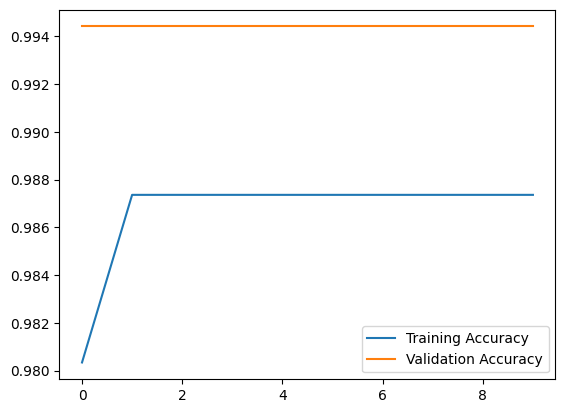

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8728 - loss: 0.4337 - val_accuracy: 0.9606 - val_loss: 0.1320
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9666 - loss: 0.1071 - val_accuracy: 0.9699 - val_loss: 0.0910
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9787 - loss: 0.0727 - val_accuracy: 0.9692 - val_loss: 0.1014
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9840 - loss: 0.0507 - val_accuracy: 0.9716 - val_loss: 0.0898
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9869 - loss: 0.0410 - val_accuracy: 0.9755 - val_loss: 0.0825
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.0887



Test accuracy: 0.9755
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


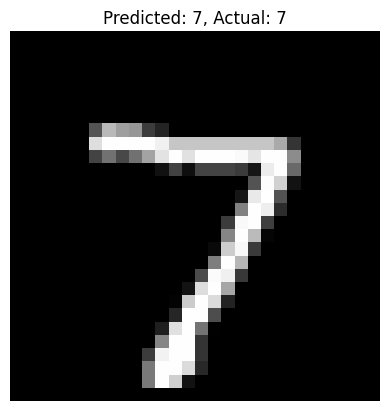

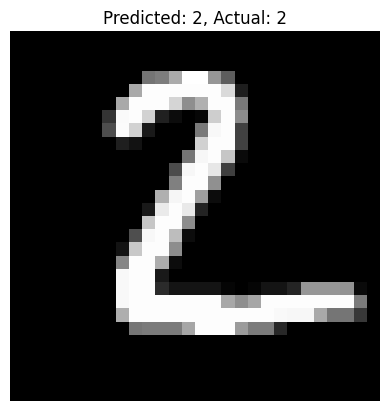

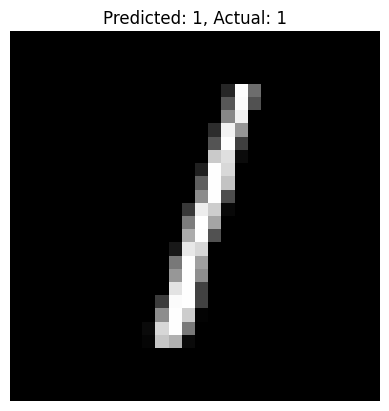

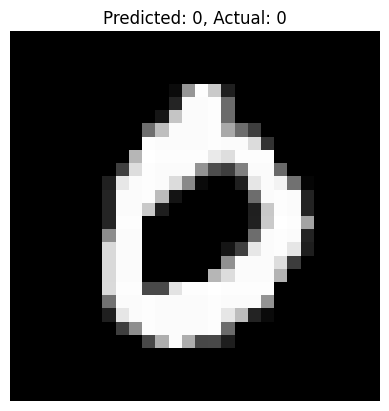

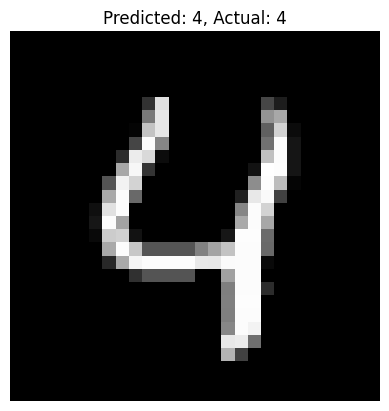

In [ ]:
# Handwritten Digit Recognition using TensorFlow and Keras

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding of labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train_cat, epochs=5, validation_data=(x_test, y_test_cat))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f'\nTest accuracy: {test_acc:.4f}')

# Predict and visualize
import numpy as np

predictions = model.predict(x_test)

# Show a few predictions
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}')
    plt.axis('off')
    plt.show()
